In [1]:
import pandas as pd
import numpy as np

"""concatenate data"""
dflist = []
for i in range(1,13):
    fn = '../2016_data_new/2016_{}_new.csv'.format(i)
    df = pd.read_csv(fn, index_col=0)
    dflist.append(df)
df = pd.concat(dflist, ignore_index=True)

In [2]:
"""select 25 most flown airports"""
grouped = df.groupby(['ORIGIN'])
grp_size = grouped.size().sort_values(ascending=False)
airports = list(grp_size.index[:25])
print airports
# print grp_size

['ATL', 'ORD', 'DEN', 'LAX', 'DFW', 'SFO', 'PHX', 'LAS', 'IAH', 'SEA', 'MSP', 'MCO', 'DTW', 'BOS', 'EWR', 'CLT', 'SLC', 'JFK', 'BWI', 'LGA', 'MDW', 'FLL', 'SAN', 'DCA', 'PHL']


In [3]:
selected = df.loc[df['ORIGIN'].isin(airports)]
# print selected['ORIGIN'].unique()
total_grp = selected.groupby(['ORIGIN']).size()

In [4]:
"""get count of delays per airport"""
delays = selected.loc[selected['ARR_DELAY']>=15]
delay_grp = delays.groupby(['ORIGIN']).size()

In [15]:
"""compute percentage of delays per airport"""
ap_pc = delay_grp.divide(total_grp)
# print ap_pc['ATL'], type(ap_pc['ATL'])
# print ap_pc[0], ap_pc.index[0]
print ap_pc

ORIGIN
ATL    0.146697
BOS    0.181082
BWI    0.166780
CLT    0.179324
DCA    0.176542
DEN    0.179900
DFW    0.211705
DTW    0.158155
EWR    0.213525
FLL    0.209519
IAH    0.159620
JFK    0.219625
LAS    0.196588
LAX    0.224737
LGA    0.216424
MCO    0.180737
MDW    0.173591
MSP    0.163389
ORD    0.220563
PHL    0.191324
PHX    0.173853
SAN    0.163492
SEA    0.153358
SFO    0.217461
SLC    0.133369
dtype: float64


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [20]:
# longitude and latitude of airports
loc = {'ATL':(-84.4,33.6), 'BOS':(-71,42.4), 'BWI':(-76.7,39.2), 'CLT':(-80.9,35.2), 'DCA':(-77,38.9),
       'DEN':(-104.7,39.9), 'DFW':(-97,32.9), 'DTW':(-83.4,42.4), 'EWR':(-74.2, 40.7), 'FLL':(-80.2,26.1),
       'IAH':(-95.3,30), 'JFK':(-73.8,40.6), 'LAS':(-115.2,36.1), 'LAX':(-118.4,33.9), 'LGA':(-73.9,40.8),
       'MCO':(-81.3,28.4), 'MDW':(-87.8,41.8), 'MSP':(-93.2,44.9), 'ORD':(-87.9,42), 'PHL':(-75.2,40),
       'PHX':(-112,33.4), 'SAN':(-117.2,32.7), 'SEA':(-122.3,47.5), 'SFO':(-122.4,37.6), 'SLC':(-112,40.8)
      }

# scale percentage to integers in a range for plotting
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(3,20))
# print ap_pc
pc_tran = scaler.fit_transform(ap_pc.reshape(-1,1)).astype(int)
# print pc_tran

C:\Users\willc\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


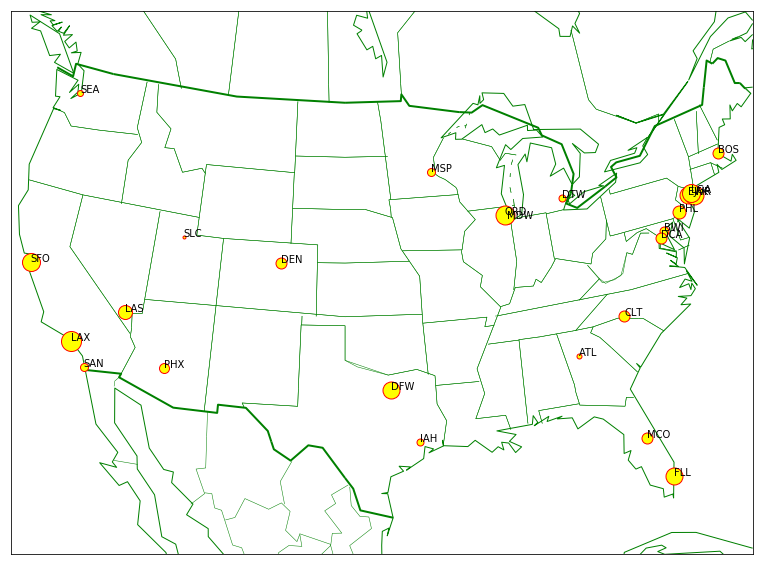

In [27]:
plt.figure(figsize=(20,10))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_0=45, lon_0=-100)
m.drawcoastlines(color='g')
m.drawcountries(color='g',linewidth=2)
m.drawstates(color='g')

for i in range(len(loc)):
    x, y = loc[ap_pc.index[i]]
    x, y = m(x, y)
    plt.plot(x, y, marker='o', markerfacecolor='yellow', markeredgecolor='red', markersize=pc_tran[i])
    plt.text(x, y, ap_pc.index[i])
plt.show()